<a href="https://colab.research.google.com/github/samobrien878/the_bootstrap/blob/main/Copy_of_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap


Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dice = np.array([1,2,3,4,5,6,])
pdf = np.zeros(6)

for value1 in range(6):
  for value2 in range(6):
    min_of_the_dice = np.min([dice[value1],dice[value2]])
    pdf[min_of_the_dice-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)
print('pdf')
print(pdf)
print(cdf)

N = 1000
d1 = np.random.choice(dice, size=N)
d2 = np.random.choice(dice, size=N)
min_roll =  [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= dice[i] )
print('ecdf')
print(ecdf)


pdf
[0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]
[0.30555556 0.55555556 0.75       0.88888889 0.97222222 1.        ]
ecdf
[0.309 0.558 0.767 0.879 0.975 1.   ]


# Ended up giving up on this question, didn't really understand what I was doing so quit while I was ahead.

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [11]:
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [14]:
cross_tab = pd.crosstab(df['treatment'], df['breast_cancer_death'])

print(cross_tab)
raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
Raw treatment effect:  0.00011505110015985753


[-0.0010426566358463507, -0.0009533442696931793, -0.000575151415797559, 0.0009386905883739249, -0.0014657175601434647, 0.0003823190807510368, 4.8139313314043974e-05, 0.0007607052353640897, 0.000515763487650478, -1.8489957098410947e-05, -0.0008199742092235285, 0.0003820588682466042, -0.0013319683328816279, 0.0005158452687232806, 0.0003598144164418393, 0.0010946842674404156, 0.0003153552514042479, -0.00037482496062424264, -0.000419395645306575, -0.000842077402811614, 0.00044893348187746707, -1.8794777460695578e-05, 0.00033777069999763043, -0.00035234260024408215, 0.0006494086299104751, 4.815418259995763e-05, 0.0004043181893372827, -0.0007977371920616649, 0.0010056618523636152, 0.0005825711894945629, 0.00044897808973531905, -0.00039671254956585855, 0.0003824008618238395, 0.0014063668052112233, -0.0010648118719353006, 0.0002929769760259271, 0.0008720464486754453, 0.001183662074659475, -0.0005749432457941017, 0.001450855708820753, 0.0001819182791478191, 0.0008276616300677553, -0.00048609182

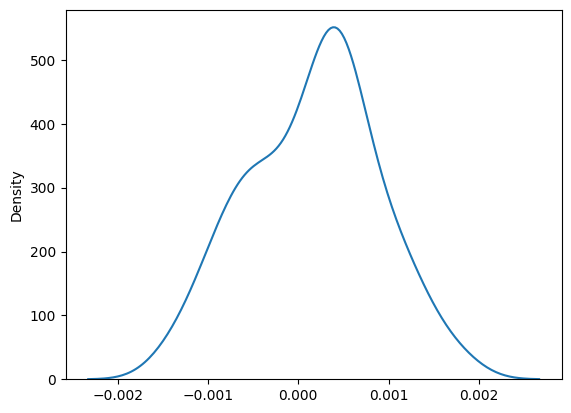

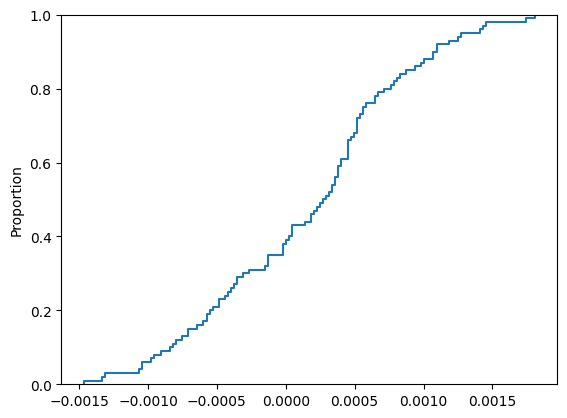

99% Confidence Interval: (-0.001400, 0.001774)


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['survive'] = 0
df.loc[df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[df['treatment'] == 'mammogram', :]
df_control = df.loc[df['treatment'] == 'control', :]

def calculate_survival_rate(data):
    return data['survive'].mean()

control_survival_rates = []
for _ in range(100):
    bootstrap_sample = df_control.sample(frac=1, replace=True)
    survival_rate = calculate_survival_rate(bootstrap_sample)
    control_survival_rates.append(survival_rate)

mammogram_survival_rates = []
for _ in range(100):
    bootstrap_sample = df_treat.sample(frac=1, replace=True)
    survival_rate = calculate_survival_rate(bootstrap_sample)
    mammogram_survival_rates.append(survival_rate)

treatment_effects = [mammogram_survival_rates[i] - control_survival_rates[i] for i in range(100)]
print(treatment_effects)
sns.kdeplot(treatment_effects)
plt.show()

sns.ecdfplot(treatment_effects)
plt.show()

lower_bound = np.percentile(treatment_effects, 0.5)
upper_bound = np.percentile(treatment_effects, 99.5)

# Print the confidence interval
print(f"99% Confidence Interval: ({lower_bound:.6f}, {upper_bound:.6f})")

While these results suggest that mamograms add no improvement in preventing cancer death, there are a series of other factors that we need to consider. For example, what if the control vs. mamorgram was assigned to a overall healthier person, obviously treatment is going to work better for them generally. Moreover, what about the wealth of a given individual, they are going to have access to additional treatments for thier cancer. Lastly, this only shows death rates, it doesnt show when they caught the cancer. So, chemotherapy might work no matter the treatment, but this data doesnt show how intense of chemo they went through.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [24]:
df1 = pd.read_csv('/content/the_bootstrap/data/diabetes_hw.csv')
df1.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [27]:
cross_tab = pd.crosstab(df1['treatment'], df1['outcome'],  margins=True)

print(cross_tab)

print('lifestyle success rate: ', 125/(125+109), '\n')
print('met success rate: ', 112/(112+120), '\n')
print('rosi success rate: ', 143/(143+90), '\n')

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699
lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



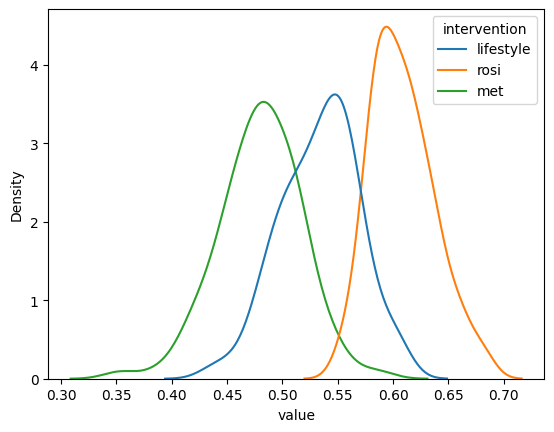

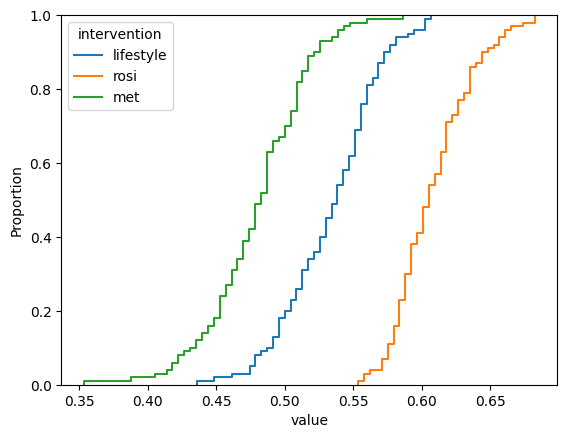

In [34]:
df_lif = df1.loc[df1['treatment'] == 'lifestyle', :]
df_ros = df1.loc[df1['treatment'] == 'rosi', :]
df_met = df1.loc[df1['treatment'] == 'met', :]

lif = []
ros = []
met = []

S = 100
for i in range(S):
  sample_lif = df_lif.sample(df_lif.shape[0], replace=True)
  sample_ros = df_ros.sample(df_ros.shape[0], replace=True)
  sample_met = df_met.sample(df_met.shape[0], replace=True)

  lif_t = np.mean(sample_lif['outcome'] == 'success')
  ros_t = np.mean(sample_ros['outcome'] == 'success')
  met_t = np.mean(sample_met['outcome'] == 'success')

  lif.append(lif_t)
  ros.append(ros_t)
  met.append(met_t)

gdf_lif = pd.DataFrame({'value':lif, 'intervention':'lifestyle'})
gdf_ros = pd.DataFrame({'value':ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met])

sns.kdeplot(data=gdf, x='value', hue='intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue='intervention')
plt.show()



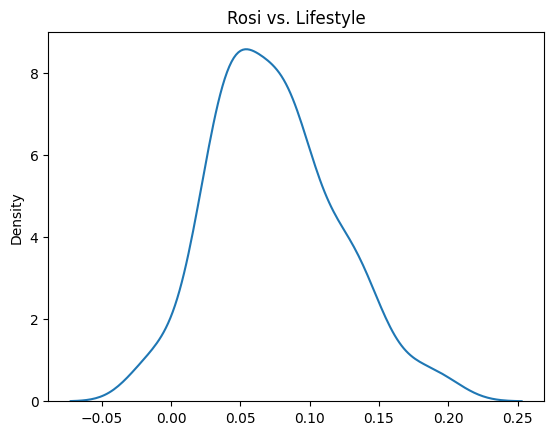

90% Confidence interval, rosi minus lifestyle: 0.018963904478925965 , 0.14436466013719235


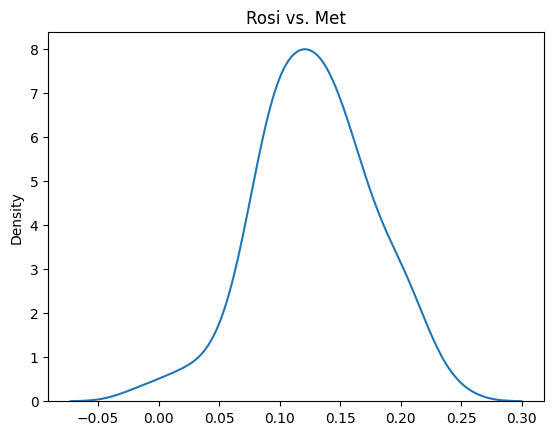

90% Confidence interval, rosi minus metformin: 0.057182366434808375 , 0.20438619209708453


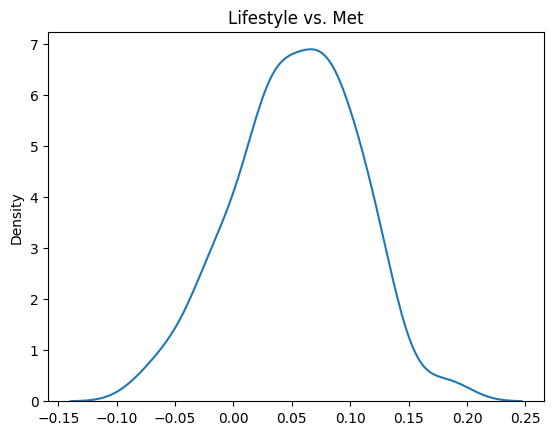

90% Confidence interval, lifestyle minus metformin: -0.026993073975832563 , 0.1286269525493663


In [36]:
rosi_versus_lifestyle = np.array(ros) - np.array(lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.title("Rosi vs. Lifestyle")
plt.show()
print('90% Confidence interval, rosi minus lifestyle:', np.quantile(rosi_versus_lifestyle, .05), ',', np.quantile(rosi_versus_lifestyle, .95))

# Rosi vs. Met
rosi_versus_met = np.array(ros) - np.array(met)
sns.kdeplot(x=rosi_versus_met)
plt.title("Rosi vs. Met")
plt.show()
print('90% Confidence interval, rosi minus metformin:', np.quantile(rosi_versus_met, .05), ',', np.quantile(rosi_versus_met, .95))

# Lifestyle vs. Met
lif_versus_met = np.array(lif) - np.array(met)
sns.kdeplot(x=lif_versus_met)
plt.title("Lifestyle vs. Met")
plt.show()
print('90% Confidence interval, lifestyle minus metformin:', np.quantile(lif_versus_met, .05), ',', np.quantile(lif_versus_met, .95))

Rosi is signficiantly differnt from lifestyle and metformin treatment

Looks like rosi is the best treatment for diabities!*italicized text*

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?